In [1]:
# The Python standard library import
import os
import shutil
from pathlib import Path
# The NEAT-Python library imports
import neat
# The helper used to visualize experiment results
import visualize

# The current working directory
#print(Path().resolve())
local_dir = os.path.join(str(Path().resolve()))
# The directory to store outputs
out_dir = str(os.path.join(local_dir, 'out'))

In [2]:
"""
The function to run XOR experiment against hyper-parameters 
defined in the provided configuration file.
The winner genome will be rendered as a graph as well as the
important statistics of neuroevolution process execution.
Arguments:
    config_file: the path to the file with experiment 
                configuration
"""
# 設定ファイルを読み込み
config_path = os.path.join(local_dir, 'reccurent_config.ini')
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation, 
                     config_path)

# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(5, filename_prefix='out/neat-checkpoint-'))


### 適当に個体群を生成して, そこから一つのネットワークを取得したい

pop = neat.Population(config)
#print(pop.population)
print(pop.species)
list(pop.population.items()) #ゲノムのリストを取得

g = list(pop.population.items())[0][1]
print('遺伝子:', g)
print('====')

print('=== createする===')
net = neat.nn.FeedForwardNetwork.create(g, config) #ゲノムから表現系を生成しているところ
      
print(' === 生成された表現型 === :',net)

#print(type(net))

print('input_nodes')
print(net.input_nodes)

print('output_nodes')
print(net.output_nodes)

print('node_evals')
print(net.node_evals)
print(net.node_evals[0])

print('values')
print(net.values)

遺伝子: Key: 1
Fitness: None
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.8214937512437682, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 0), weight=0.6256654697161571, enabled=True)
	DefaultConnectionGene(key=(-1, 0), weight=1.5955258259794065, enabled=True)
====
=== createする===
 --- genome可視化 --- 
genomeの型: <class 'neat.genome.DefaultGenome'>
genome.key: 1
genome.connections: {(-1, 0): <neat.genes.DefaultConnectionGene object at 0x7fd571e47588>, (-2, 0): <neat.genes.DefaultConnectionGene object at 0x7fd571e475c0>}
genome.nodes: {0: <neat.genes.DefaultNodeGene object at 0x7fd571e47550>}
genome.fitness: None
connections: [(-1, 0), (-2, 0)]
生成されるレイヤー: [{0}]
 === 生成された表現型 === : <neat.nn.feed_forward.FeedForwardNetwork object at 0x7fd56028dac8>
input_nodes
[-1, -2]
output_nodes
[0]
node_evals
[(0, <function sigmoid_activation at 0x7fd530054488>, <function sum_aggregation at 0x7fd550021598>, -0.8214937512437682, 1.0, [(-1, 1.5955258259794065), (-2

In [4]:
#単一の個体に対して入力->出力を得る
output = net.activate([100,200])
print(output)

---
inputs,self.input_nodes [100, 200] [-1, -2]
self.input_nodes: [-1, -2]
self.values: {0: 1.0, -2: 200, -1: 100}
---
inputs,self.input_nodes [100, 200] [-1, -2]
self.input_nodes: [-1, -2]
self.values: {0: 1.0, -2: 200, -1: 100}
===
self.node_evals: [(0, <function sigmoid_activation at 0x7fd530054488>, <function sum_aggregation at 0x7fd550021598>, -0.8214937512437682, 1.0, [(-1, 1.5955258259794065), (-2, 0.6256654697161571)])]
[1.0]


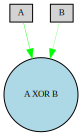

In [5]:
#ネットワークを可視化する
# Visualize the experiment results
node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
visualize.draw_net(config, g, True, node_names=node_names, directory=out_dir)

In [6]:
### 適当に個体群を生成して, そこから一つのネットワークを取得したい

pop = neat.Population(config)
#print(pop.population)
print(pop.species)
list(pop.population.items()) #ゲノムのリストを取得

g = list(pop.population.items())[0][1]
print('遺伝子:', g)

net = neat.nn.FeedForwardNetwork.create(g, config)
print('表現型:',net)
#print(type(net))

print('input_nodes')
print(net.input_nodes)

print('output_nodes')
print(net.output_nodes)

print('node_evals')
print(net.node_evals)
print(net.node_evals[0])

print('values')
print(net.values)

遺伝子: Key: 1
Fitness: None
Nodes:
	0 DefaultNodeGene(key=0, bias=0.9290311950374088, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 0), weight=-1.1318087719324017, enabled=True)
	DefaultConnectionGene(key=(-1, 0), weight=0.3122573204935441, enabled=True)
表現型: <neat.nn.feed_forward.FeedForwardNetwork object at 0x7f8699e0f940>
input_nodes
[-1, -2]
output_nodes
[0]
node_evals
[(0, <function sigmoid_activation at 0x7f8658053488>, <function sum_aggregation at 0x7f86990f0598>, 0.9290311950374088, 1.0, [(-1, 0.3122573204935441), (-2, -1.1318087719324017)])]
(0, <function sigmoid_activation at 0x7f8658053488>, <function sum_aggregation at 0x7f86990f0598>, 0.9290311950374088, 1.0, [(-1, 0.3122573204935441), (-2, -1.1318087719324017)])
values
{0: 0.0, -2: 0.0, -1: 0.0}


In [4]:
def clean_output():
    if os.path.isdir(out_dir):
        # remove files from previous run
        shutil.rmtree(out_dir)

    # create the output directory
    os.makedirs(out_dir, exist_ok=False)

In [17]:
# Run for up to 300 generations.
best_genome = p.run(eval_genomes, 300)
print(type(best_genome))

NameError: name 'eval_genomes' is not defined

In [19]:
# Display the best genome among generations.
print('\nBest genome:\n{!s}'.format(best_genome))

# Show output of the most fit genome against training data.
print('\nOutput:')
net = neat.nn.FeedForwardNetwork.create(best_genome, config)
for xi, xo in zip(xor_inputs, xor_outputs):
    output = net.activate(xi)
    print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))


Best genome:
Key: 8982
Fitness: 15.6522167942852
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.9093843855586577, response=1.0, activation=sigmoid, aggregation=sum)
	1011 DefaultNodeGene(key=1011, bias=-1.8190846212923804, response=1.0, activation=sigmoid, aggregation=sum)
	1521 DefaultNodeGene(key=1521, bias=-1.080282397236218, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 0), weight=-2.4840053630094694, enabled=True)
	DefaultConnectionGene(key=(-2, 1011), weight=2.7765611815684395, enabled=True)
	DefaultConnectionGene(key=(-2, 1521), weight=-0.02613607148710209, enabled=True)
	DefaultConnectionGene(key=(-1, 0), weight=1.5847680499351735, enabled=True)
	DefaultConnectionGene(key=(-1, 1011), weight=-0.44055113171912663, enabled=False)
	DefaultConnectionGene(key=(-1, 1521), weight=1.187616432186448, enabled=True)
	DefaultConnectionGene(key=(1011, 0), weight=11.883832694203981, enabled=True)
	DefaultConnectionGene(key=(1521, 1011), weight=-3.6